# Dataset Citation & Acknowledgment Introduction

We will train a classifier to predict whether an X-Ray of a patient shows signs of pneumonia or not based on the RSNA Pneumonia Detection Challenge (https://www.kaggle.com/c/rsna-pneumonia-detection-challenge).

Acknowledgements: Wang X, Peng Y, Lu L, Lu Z, Bagheri M, Summers RM. ChestX-ray8: Hospital-scale Chest X-ray Database and Benchmarks on Weakly-Supervised Classification and Localization of Common Thorax Diseases. IEEE CVPR 2017, http://openaccess.thecvf.com/content_cvpr_2017/papers/Wang_ChestX-ray8_Hospital-Scale_Chest_CVPR_2017_paper.pdf

Original Source: https://nihcc.app.box.com/v/ChestXray-NIHCC

In [1]:
from path import Path
import matplotlib.pyplot as plt
import pydicom 
import pandas as pd
import numpy as np 
import cv2
import os

# <font color='red'>Preprocessing Lung Images </font>

### Labels

In [2]:
# Read labels
labels = pd.read_csv('datasets/RSNA-Pneumonia-Detection-Challenge/stage_2_train_labels.csv')
# Drop Duplicates
labels = labels.drop_duplicates('patientId')
# shoe head
labels.head(5)

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1


### Show Sample Images

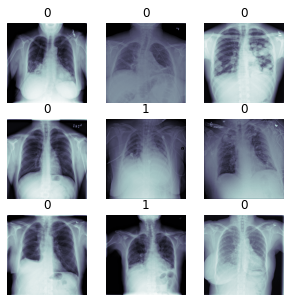

In [3]:
ROOT_PATH = Path('datasets/RSNA-Pneumonia-Detection-Challenge/stage_2_train_images/')
SAVE_PATH = Path('datasets/RSNA-Pneumonia-Detection-Challenge/stage_2_train_images_Processed/')

# Visualization for the first 9 images
fig, axis = plt.subplots(3, 3, figsize=(5, 5))
c = 0
for i in range(3):
    for j in range(3):
        # Get unique patient ID
        patient_id = labels.patientId.iloc[c]
        label = labels["Target"].iloc[c]
        
        # Concate Path with appropriate suffix
        dcm_path = ROOT_PATH / patient_id
        dcm_path = dcm_path.with_suffix(".dcm")
        
        # Read dicom file and get the image
        dcm = pydicom.read_file(dcm_path).pixel_array
        
        axis[i][j].axis('off')
        axis[i][j].imshow(dcm, cmap="bone")
        axis[i][j].set_title(label)
        c+=1

### <font color='green'> Standardization and Normalization </font>

In [4]:
from tqdm.notebook import tqdm
from termcolor import colored
import os

In [5]:
# Standardization and Normalization
sums = 0
sums_squared = 0

for i, patient_id in enumerate(tqdm(labels.patientId)):
    # Get unique patient ID
    patient_id = labels.patientId.iloc[i]
    label = labels["Target"].iloc[i]
    
    # Concate Path with appropriate suffix
    dcm_path = ROOT_PATH / patient_id
    dcm_path = dcm_path.with_suffix(".dcm")
    
    ########################################################################
    # Read dicom file and get the image ** Standardization **
    dcm = pydicom.read_file(dcm_path).pixel_array 

    # Resizing 
    dcm_resized = cv2.resize(dcm,(224,224)).astype(np.float32)
    
    # Train Validation Split
    train_or_valid = 'train' if i < 24000 else 'val'
    
    # Define save path and create if necessary
    current_save_path = SAVE_PATH/train_or_valid/str(label)
    os.makedirs(current_save_path,exist_ok=True)

    
    # Save the array in the corresponding directory
    filename = f"{current_save_path}/{patient_id}.png"
    cv2.imwrite(filename,dcm_resized)

  0%|          | 0/26684 [00:00<?, ?it/s]